## Route between two random nodes

In [1]:
import numpy as np
import osmnx as ox
import networkx as nx

from sklearn.neighbors import KDTree
import folium

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# creating a graph by using a point in downtown Omaha
old_market = (41.255676, -95.931338)
G = ox.graph_from_point(old_market, distance=500)

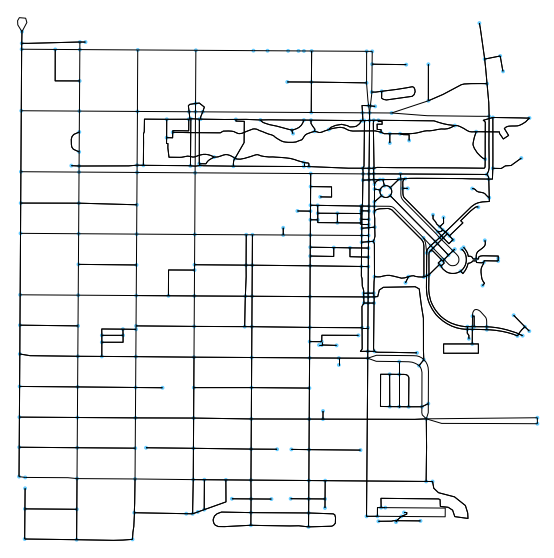

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x12373beb8>)

In [3]:
ox.plot_graph(G, fig_height=10, fig_width=10, edge_color='black')

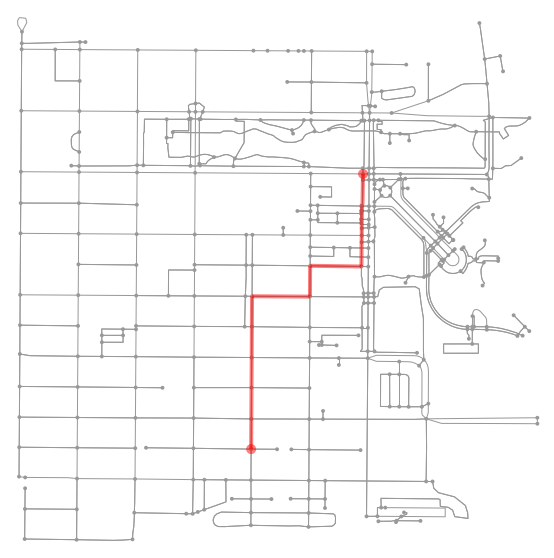

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x123a484e0>)

In [6]:
# using NetworkX to calculate the shortest path between two random nodes
route = nx.shortest_path(G, np.random.choice(G.nodes), np.random.choice(G.nodes))
ox.plot_graph_route(G, route, fig_height=10, fig_width=10)

## Route between two points

In [7]:
library = ox.geocode('215 S 15th St, Omaha, NE 68102')
museum = ox.geocode('801 S 10th St, Omaha, NE 68108')

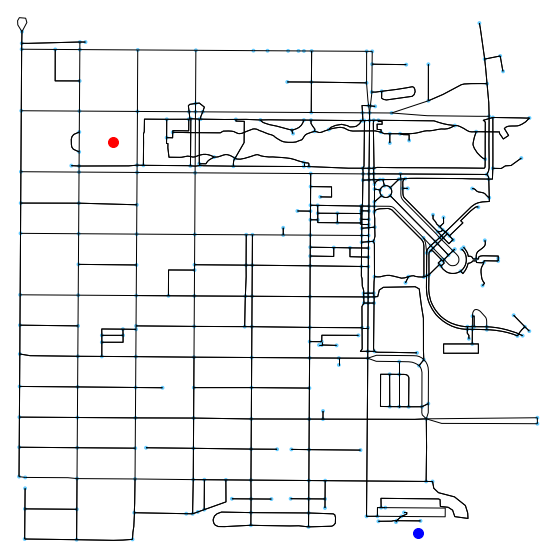

In [8]:
fig, ax = ox.plot_graph(G, fig_height=10, fig_width=10, 
                        show=False, close=False, 
                        edge_color='black')

ax.scatter(library[1], library[0], c='red', s=100)
ax.scatter(museum[1], museum[0], c='blue', s=100)

plt.show()

In [11]:
nodes, _ = ox.graph_to_gdfs(G)
nodes.head()

,highway,osmid,x,y,geometry
133938305,NaN,133938305,-95.928,41.2544,POINT (-95.9279772 41.2543763)
133938322,traffic_signals,133938322,-95.9293,41.2544,POINT (-95.92925839999999 41.2544017)
133938324,NaN,133938324,-95.9306,41.2544,POINT (-95.93058720000001 41.2544065)
133938327,NaN,133938327,-95.9319,41.2544,POINT (-95.9319101 41.254414)
133938330,traffic_signals,133938330,-95.9332,41.2544,POINT (-95.93322860000001 41.2544198)


In [12]:
tree = KDTree(nodes[['y', 'x']], metric='euclidean')

lib_idx = tree.query([library], k=1, return_distance=False)[0]
museum_idx = tree.query([museum], k=1, return_distance=False)[0]

closest_node_to_lib = nodes.iloc[lib_idx].index.values[0]
closest_node_to_museum = nodes.iloc[museum_idx].index.values[0]

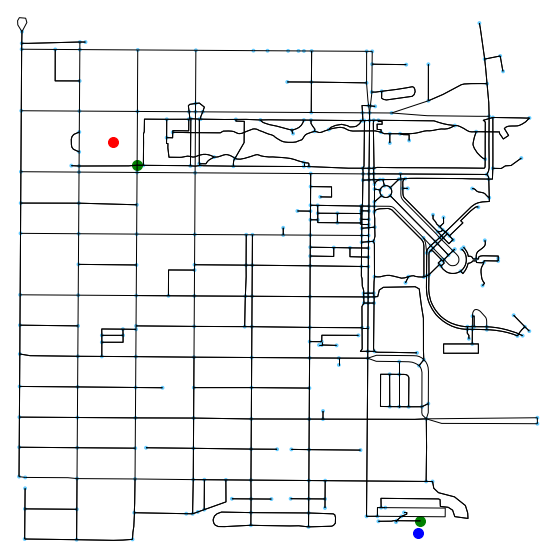

In [21]:
fig, ax = ox.plot_graph(G, fig_height=10, fig_width=10, 
                        show=False, close=False, 
                        edge_color='black')

ax.scatter(library[1], library[0], c='red', s=100)
ax.scatter(museum[1], museum[0], c='blue', s=100)

ax.scatter(G.node[closest_node_to_lib]['x'], G.node[closest_node_to_lib]['y'], c='green', s=100)
ax.scatter(G.node[closest_node_to_museum]['x'], G.node[closest_node_to_museum]['y'], c='green', s=100)

plt.show()

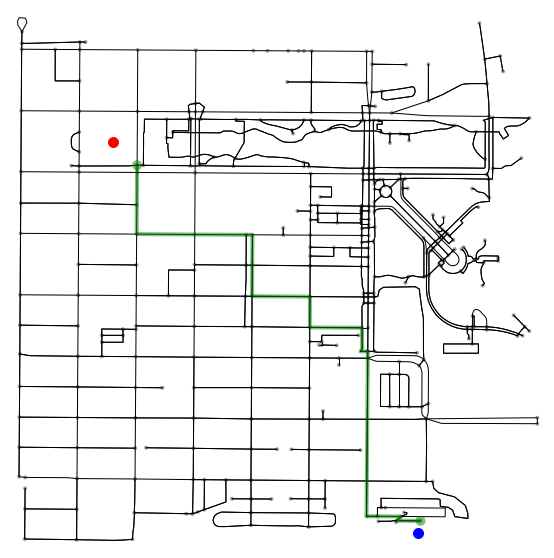

In [33]:
route = nx.shortest_path(G, closest_node_to_lib, closest_node_to_museum)

fig, ax = ox.plot_graph_route(G, route, fig_height=10, fig_width=10, 
                    show=False, close=False, 
                    edge_color='black',
                    orig_dest_node_color='green',
                    route_color='green')

ax.scatter(library[1], library[0], c='red', s=100)
ax.scatter(museum[1], museum[0], c='blue', s=100)

plt.show()

In [40]:
m = ox.plot_route_folium(G, route, route_color='green')
folium.Marker(location=library, icon=folium.Icon(color='red')).add_to(m)
folium.Marker(location=museum, icon=folium.Icon(color='blue')).add_to(m)
m